<a href="https://colab.research.google.com/github/yashjangra07/WordForThought/blob/main/.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print(tf.__version__)
import gdown
gdown.download(url='https://drive.google.com/file/d/1lCP_8owqZTrSedmdy06ATqe2dIuaaefT/view?usp=drive_link',output='animal_data')
!unzip animal_data -d ./animals_data

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1lCP_8owqZTrSedmdy06ATqe2dIuaaefT
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1lCP_8owqZTrSedmdy06ATqe2dIuaaefT/view?usp=drive_link
To: /content/animal_data


2.17.1


8.92kB [00:00, 11.3MB/s]


Archive:  animal_data
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of animal_data or
        animal_data.zip, and cannot find animal_data.ZIP, period.


In [ ]:
import os
os.listdir('./animals_data/animal_data')
train_data = tf.keras.utils.image_dataset_from_directory(
    directory='./animals_data/animal_data',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=69,
    validation_split=0.2,
    subset='training'
)

test_data = tf.keras.utils.image_dataset_from_directory(
    directory='./animals_data/animal_data',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='validation'
)

Found 1944 files belonging to 15 classes.
Using 1556 files for training.
Found 1944 files belonging to 15 classes.
Using 388 files for validation.


(32, 224, 224, 3)
(32,)


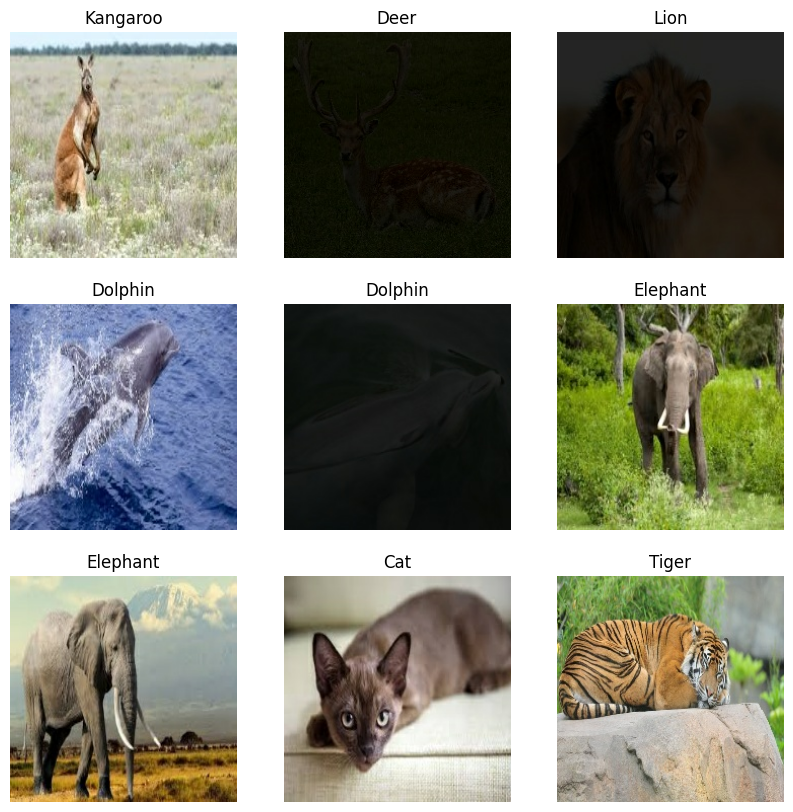

In [ ]:
train_data.class_names
plt.figure(figsize=(10, 10))
for images,labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(train_data.class_names[labels[i]])
        plt.axis('off')

for image_batch, label_batch in train_data:
    print(image_batch.shape)
    print(label_batch.shape)
    break


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, (3, 3), strides=(1, 1), padding="valid", activation='relu'),
    tf.keras.layers.MaxPooling2D( pool_size=(2, 2), strides=None, padding="valid",),
    tf.keras.layers.Conv2D(64, (3, 3), strides=(1, 1),padding="valid", activation='relu'),
    tf.keras.layers.MaxPooling2D( pool_size=(2, 2), strides=None, padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(15, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=15
)

model.summary()

Epoch 1/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 130s 3s/step - accuracy: 0.1607 - loss: 3.3912 - val_accuracy: 0.4820 - val_loss: 1.7700
Epoch 2/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - accuracy: 0.5741 - loss: 1.5279 - val_accuracy: 0.8093 - val_loss: 0.8369
Epoch 3/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 138s 3s/step - accuracy: 0.8827 - loss: 0.5675 - val_accuracy: 0.8943 - val_loss: 0.6021
Epoch 4/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.9624 - loss: 0.2371 - val_accuracy: 0.8686 - val_loss: 0.7502
Epoch 5/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 137s 3s/step - accuracy: 0.9621 - loss: 0.1840 - val_accuracy: 0.9278 - val_loss: 0.4629
Epoch 6/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.9835 - loss: 0.0681 - val_accuracy: 0.9459 - val_loss: 0.5143
Epoch 7/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.9977 - loss: 0.0304 - val_accuracy: 0.9433 - val_loss: 0.5108
Epoch 8/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 145s 3s/step - accuracy: 0.9957 - loss: 0.0337 - val_accuracy: 0.9433 - v